# Practica 9 : Pronostico
### Rodrigo Antonio Martinez Macias 1896222

In [11]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('../Data-Treated/fixed_data_who_suicide.csv')

# Correcion de formato
df['year'] = pd.to_datetime(df['year'])
df['year'] = df['year'].dt.year

# Utilizar la función unique() para obtener los países únicos y se transorma en un set
paises_unicos = set(df['country'].unique())

# Ordenar el conjunto alfabéticamente
paises_unicos = sorted(paises_unicos)

                            OLS Regression Results                            
Dep. Variable:      suicides_per_year   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     7.391
Date:                Thu, 23 Nov 2023   Prob (F-statistic):             0.0100
Time:                        22:29:25   Log-Likelihood:                -455.38
No. Observations:                  38   AIC:                             914.8
Df Residuals:                      36   BIC:                             918.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.036e+06   1.18e+06     -2.582      0.0

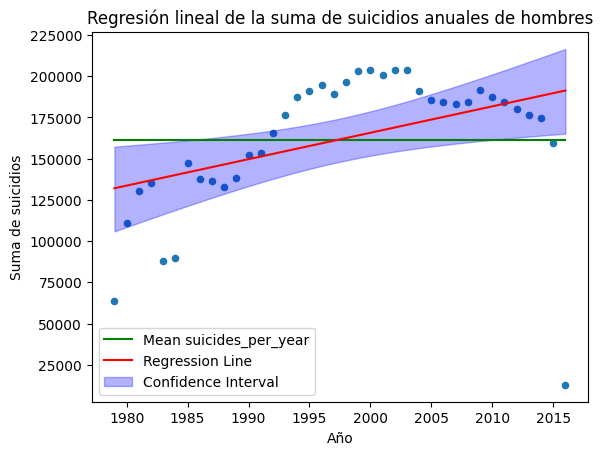

In [13]:
def linear_regression_with_ci(df: pd.DataFrame, x:str, y: str, labelx, labely, title)->None:
    # Ajustar el modelo de regresión lineal
    model = sm.OLS(df[y], sm.add_constant(df[x])).fit()
    print(model.summary())
    
    # Obtener coeficientes y media
    coef = pd.read_html(model.summary().tables[1].as_html(), header=0, index_col=0)[0]['coef']
    y_mean = df[y].mean()
    
    # Graficar los datos y la línea de regresión
    df.plot(x=x, y=y, kind='scatter')
    plt.plot(df[x], [y_mean] * len(df), color='green', label=f'Mean {y}')
    plt.plot(df[x], coef.values[1] * df[x] + coef.values[0], color='red', label='Regression Line')
    
    # Obtener intervalos de confianza
    predictions = model.get_prediction()
    pred_conf = predictions.summary_frame(alpha=0.05)
    
    # Dibujar la franja de pronóstico
    plt.fill_between(df[x], pred_conf['mean_ci_lower'], pred_conf['mean_ci_upper'], color='blue', alpha=0.3, label='Confidence Interval')
    
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.title(title)
    plt.legend()
    plt.show()


# Utilizar el nuevo código para el segundo conjunto de datos
df_by_year_suicides = df.groupby(['sex', 'year']).agg(suicides_per_year=('suicides_no', 'sum')).reset_index()
df_by_year_suicides.reset_index(inplace=True)
df_by_year_suicides = df_by_year_suicides[df_by_year_suicides['sex'] == 'male']
linear_regression_with_ci(df_by_year_suicides, "year", "suicides_per_year", 
                          "Año", "Suma de suicidios", "Regresión lineal de la suma de suicidios anuales de hombres")
